In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data=df.drop(columns=["molecule_name", "conformation_name","ID"])

In [5]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
data.iloc[:,1:].describe()

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,-207.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,-83.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,-46.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,176.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [7]:
data.isnull().values.any()

False

In [8]:
data.drop_duplicates(keep = False, inplace = True)
data.shape

(6568, 167)

In [9]:
data["class"].value_counts()

0    5551
1    1017
Name: class, dtype: int64

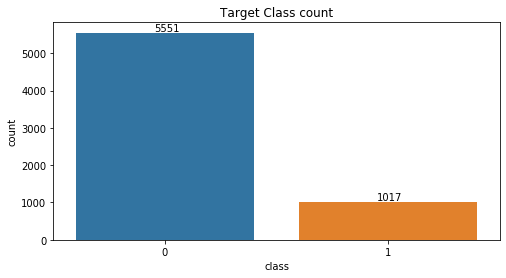

In [10]:
plt.figure(figsize = (8, 4))
plot = sns.countplot(data['class'])
plot.set_title("Target Class count")
for p in plot.patches:
    plot.annotate('{}'.format(p.get_height()), xy = (p.get_x() + 0.35, p.get_height() + 40))

In [11]:
data=np.array(data)

In [12]:
X = data[:,1:166]
Y = data[:,166]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
print(x_train.shape)

(5254, 165)


In [15]:
model = Sequential()
model.add(Dense(25, input_dim=165, activation='relu')) 
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, nb_epoch=10,batch_size=32, validation_split=0.2, shuffle=True)

model.test_on_batch(x_test, y_test)

/home/omraj/.local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4203 samples, validate on 1051 samples
Epoch 1/10
4203/4203 [==============================] - 1s 264us/step - loss: 1.5056 - acc: 0.8068 - val_loss: 0.3668 - val_acc: 0.8573
Epoch 2/10
4203/4203 [==============================] - 1s 143us/step - loss: 0.3617 - acc: 0.8423 - val_loss: 0.2714 - val_acc: 0.8582
Epoch 3/10
4203/4203 [==============================] - 1s 143us/step - loss: 0.2988 - acc: 0.8484 - val_loss: 0.2520 - val_acc: 0.8877
Epoch 4/10
4203/4203 [==============================] - 1s 141us/step - loss: 0.2656 - acc: 0.8691 - val_loss: 0.2040 - val_acc: 0.9039
Epoch 5/10
4203/4203 [==============================] - 1s 139us/step - loss: 0.2176 - acc: 0.8927 - val_loss: 0.1934 - val_acc: 0.9172
Epoch 6/10
4203/4203 [==============================] - 1s 156us/step - loss: 0.1937 - acc: 0.9036 - val_loss: 0.2088 - val_acc: 0.9267
Epoch 7/10
4203/4203 [==============================] - 1s 160us/step - loss: 0.1797 - acc: 0.9117 - val_loss: 0.1320 - val_acc: 0.9391


[0.15856919, 0.94596654]

In [17]:
model.evaluate(x_test,y_test)

1314/1314 [==============================] - 0s 77us/step


[0.15856922239180588, 0.9459665144596652]

In [18]:
model.evaluate(x_train,y_train)

5254/5254 [==============================] - 0s 63us/step


[0.15842547378278818, 0.9421393223983233]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


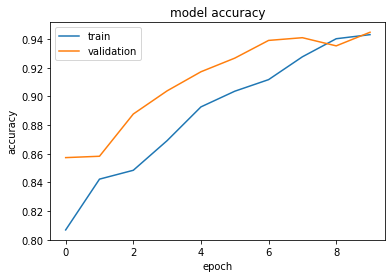

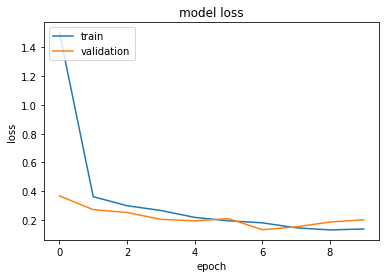

In [19]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
model.save_weights("model.h5")